In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("F:/MyUCP/DataScience/Training/A_B_Test_Analyis/marketing_AB.csv")
data.head(10)

Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   
5           5  1137664         ad      False        734     Saturday   
6           6  1116205         ad      False        264    Wednesday   
7           7  1496843         ad      False         17       Sunday   
8           8  1448851         ad      False         21      Tuesday   
9           9  1446284         ad      False        142       Monday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  
5             10  
6             13  
7             18  
8             19  
9             14

In [3]:
data.describe()

Unnamed: 0       user id      total ads  most ads hour
count  588101.000000  5.881010e+05  588101.000000  588101.000000
mean   294050.000000  1.310692e+06      24.820876      14.469061
std    169770.279667  2.022260e+05      43.715181       4.834634
min         0.000000  9.000000e+05       1.000000       0.000000
25%    147025.000000  1.143190e+06       4.000000      11.000000
50%    294050.000000  1.313725e+06      13.000000      14.000000
75%    441075.000000  1.484088e+06      27.000000      18.000000
max    588100.000000  1.654483e+06    2065.000000      23.000000

In [4]:
data.shape

(588101, 7)

In [5]:
data.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [6]:
data.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [8]:
data.describe().T

count          mean            std       min        25%  \
Unnamed: 0     588101.0  2.940500e+05  169770.279667       0.0   147025.0   
user id        588101.0  1.310692e+06  202225.983128  900000.0  1143190.0   
total ads      588101.0  2.482088e+01      43.715181       1.0        4.0   
most ads hour  588101.0  1.446906e+01       4.834634       0.0       11.0   

                     50%        75%        max  
Unnamed: 0      294050.0   441075.0   588100.0  
user id        1313725.0  1484088.0  1654483.0  
total ads           13.0       27.0     2065.0  
most ads hour       14.0       18.0       23.0

In [10]:
# Need to have a look at Unique values of each column
data["test group"].unique()

array(['ad', 'psa'], dtype=object)

In [11]:
data["converted"].unique()

array([False,  True])

In [12]:
data["total ads"].unique()

array([ 130,   93,   21,  355,  276,  734,  264,   17,  142,  209,   47,
         61,   40,   20,    9,   64,   26,  248,   73,  281,  389,  136,
         87,   46,    3,  114,  175,  119,  313,   89,  364,   24,  112,
         49,   27,  274,   45,  177,   90,  265,   71,   31,  588,   56,
        108,  103,  239,   63,   66,  111,   74,   14,  258, 1057,  137,
        131,  124,   13,   37,  738,  199,  211,   98,   19,  127,   18,
        126,  197,   77,   60,   95,   97,   22,  117,   41,   57,  593,
         28,   85,   53,   43,  133,   33, 1328,    7,    6,   62,  247,
        464,   99,  233,  139,  407,  323,   76,  395,  166,   34,  246,
        653,  122,   32,  386,   44,  138,  109,   39,  159,   30,   59,
        421,  446,  555,  105,  128,  310,  163,   10,  290,  164,   79,
        312,   16,  161,  505,  640,  118,  266,  456,   80,  100,  983,
         36,    1,    5,  463,  720,   52,  442,  334, 1056,  270,  240,
        194,  271,  489,  115,  180,  241,   15,  1

In [13]:
data["most ads day"].unique()

array(['Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

In [14]:
data["most ads hour"].unique()

array([20, 22, 18, 10, 14, 13, 19, 11, 12, 16, 21,  3, 23,  4,  8,  0,  2,
       15,  1,  6, 17,  7,  9,  5], dtype=int64)

In [17]:
# Data processing 
#in data processig i will convert [convreted] into int type
data["converted"]=data["converted"].astype(int)
data.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted         int32
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [26]:
#Statistical_Testing
cntrl_grp,test_grp=data[data["test group"]=="psa"],data[data["test group"]=="ad"]
test_grp

Unnamed: 0  user id test group  converted  total ads most ads day  \
0                0  1069124         ad          0        130       Monday   
1                1  1119715         ad          0         93      Tuesday   
2                2  1144181         ad          0         21      Tuesday   
3                3  1435133         ad          0        355      Tuesday   
4                4  1015700         ad          0        276       Friday   
...            ...      ...        ...        ...        ...          ...   
588096      588096  1278437         ad          0          1      Tuesday   
588097      588097  1327975         ad          0          1      Tuesday   
588098      588098  1038442         ad          0          3      Tuesday   
588099      588099  1496395         ad          0          1      Tuesday   
588100      588100  1237779         ad          0          1      Tuesday   

        most ads hour  
0                  20  
1                  22  
2                  18  
3                  10  
4                  14  
...               ...  
588096             23  
588097             23  
588098             23  
588099             23  
588100             23  

[564577 rows x 7 columns]

In [27]:
cntrl_grp

Unnamed: 0  user id test group  converted  total ads most ads day  \
18              18   900681        psa          0        248     Saturday   
38              38   905704        psa          0         27     Thursday   
68              68   904595        psa          0         13      Tuesday   
140            140   901904        psa          0         32    Wednesday   
157            157   902234        psa          0        105      Tuesday   
...            ...      ...        ...        ...        ...          ...   
588052      588052   900959        psa          0         16      Tuesday   
588063      588063   902828        psa          0          3      Tuesday   
588066      588066   914578        psa          0          1      Tuesday   
588069      588069   909042        psa          0          6      Tuesday   
588081      588081   904721        psa          0         16      Tuesday   

        most ads hour  
18                 19  
38                  8  
68                 19  
140                19  
157                19  
...               ...  
588052             22  
588063             22  
588066             22  
588069             22  
588081             23  

[23524 rows x 7 columns]

In [28]:
t_stat, p_val = stats.ttest_ind(test_grp['converted'], cntrl_grp['converted'])

In [29]:
# T_statistics
t_stat

7.37040597428566

In [32]:
# P_Value
p_val

1.7033052627831264e-13

In [34]:
if p_val<0.05:
    print("Ignoring the null hypothese significante conversion rate of  ad and psa exists ")
else:
    print("Couldnt ignore the null hypothesis Significant rates between ad and psa doesnt esist")

Ignoring the null hypothese significante conversion rate of  ad and psa exists 


In [38]:
# Most Ads Day Analysis
anova_result_day = stats.f_oneway(
    data[data['most ads day'] == 'Monday']['converted'],
    data[data['most ads day'] == 'Tuesday']['converted'],
    data[data['most ads day'] == 'Wednesday']['converted'],
    data[data['most ads day'] == 'Thursday']['converted'],
    data[data['most ads day'] == 'Friday']['converted'],
    data[data['most ads day'] == 'Saturday']['converted'],
    data[data['most ads day'] == 'Sunday']['converted']
)
print("Most Ads Day Analysis - F-statistic:",anova_result_day.statistic, "P-value: ",anova_result_day.pvalue)

Most Ads Day Analysis - F-statistic: 68.38818386898062 P-value:  1.8032007655359558e-85


In [39]:
if anova_result_day.pvalue < 0.05:
    print("Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.")
else:
    print("Fail to reject the null hypothesis: The day with the most ads seen does not significantly affect conversion rates.")

Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.


In [40]:
# Most Ads Hour Analysis
anova_result_hour = stats.f_oneway(
    data[data['most ads hour'] == 0]['converted'],
    data[data['most ads hour'] == 1]['converted'],
    data[data['most ads hour'] == 2]['converted'],
    data[data['most ads hour'] == 3]['converted'],
    data[data['most ads hour'] == 4]['converted'],
    data[data['most ads hour'] == 5]['converted'],
    data[data['most ads hour'] == 6]['converted'],
    data[data['most ads hour'] == 7]['converted'],
    data[data['most ads hour'] == 8]['converted'],
    data[data['most ads hour'] == 9]['converted'],
    data[data['most ads hour'] == 10]['converted'],
    data[data['most ads hour'] == 11]['converted'],
    data[data['most ads hour'] == 12]['converted'],
    data[data['most ads hour'] == 13]['converted'],
    data[data['most ads hour'] == 14]['converted'],
    data[data['most ads hour'] == 15]['converted'],
    data[data['most ads hour'] == 16]['converted'],
    data[data['most ads hour'] == 17]['converted'],
    data[data['most ads hour'] == 18]['converted'],
    data[data['most ads hour'] == 19]['converted'],
    data[data['most ads hour'] == 20]['converted'],
    data[data['most ads hour'] == 21]['converted'],
    data[data['most ads hour'] == 22]['converted'],
    data[data['most ads hour'] == 23]['converted']
)
print(f"Most Ads Hour Analysis - F-statistic: {anova_result_hour.statistic}, P-value: {anova_result_hour.pvalue}")

Most Ads Hour Analysis - F-statistic: 18.742037312974496, P-value: 7.482025334833055e-77


In [41]:
if anova_result_hour.pvalue < 0.05:
    print("Reject the null hypothesis: The hour with the most ads seen significantly affects the conversion rate.")
else:
    print("Fail to reject the null hypothesis: The hour with the most ads seen does not significantly affect conversion rates.")

Reject the null hypothesis: The hour with the most ads seen significantly affects the conversion rate.


In [42]:
# Total Ads Analysis
df_subset = data[data['total ads'] < 50].copy()

#create bins for total_ads
# Create bins for total_ads using .loc
df_subset.loc[:, 'total_ads_bin'] = pd.cut(df_subset['total ads'], bins=[-1, 1, 5, 10, 20, 30, 40, 50], labels=['0-1', '2-5', '6-10', '11-20', '21-30', '31-40', '41-50'])

#perform ANOVA on binned data
anova_result_bin = stats.f_oneway(
    df_subset[df_subset['total_ads_bin'] == '0-1']['converted'],
    df_subset[df_subset['total_ads_bin'] == '2-5']['converted'],
    df_subset[df_subset['total_ads_bin'] == '6-10']['converted'],
    df_subset[df_subset['total_ads_bin'] == '11-20']['converted'],
    df_subset[df_subset['total_ads_bin'] == '21-30']['converted'],
    df_subset[df_subset['total_ads_bin'] == '31-40']['converted'],
    df_subset[df_subset['total_ads_bin'] == '41-50']['converted']
)

print(f"Total Ads (Binned) Analysis - F-statistic: {anova_result_bin.statistic}, P-value: {anova_result_bin.pvalue}")

Total Ads (Binned) Analysis - F-statistic: 1245.6689124986833, P-value: 0.0


In [43]:
if anova_result_bin.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).")
else:
    print("Fail to reject the null hypothesis: The number of ads seen (binned) does not significantly affect conversion rates.")

Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).


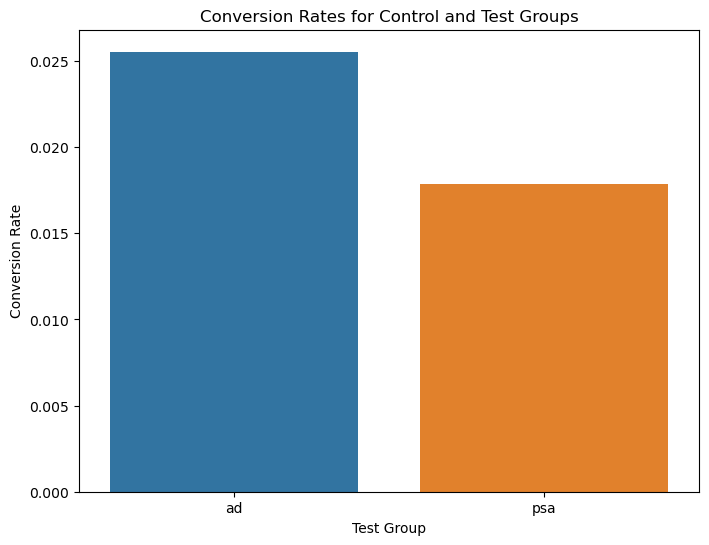

In [45]:
#conversion Rates for Test Group
conversion_rates = data.groupby('test group')['converted'].mean().reset_index()
conversion_rates.columns = ['Test Group', 'Conversion Rate']
plt.figure(figsize=(8, 6))
sns.barplot(x='Test Group', y='Conversion Rate', data=conversion_rates)
plt.title('Conversion Rates for Control and Test Groups')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

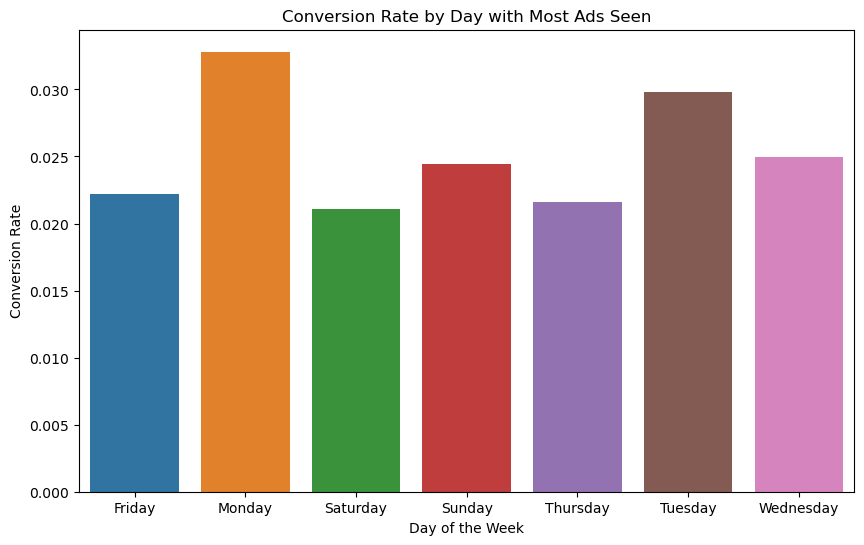

In [47]:
#conversion Rate by Most Ads Day
day_conversion_rate = data.groupby('most ads day')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=day_conversion_rate, x='most ads day', y='converted')
plt.title('Conversion Rate by Day with Most Ads Seen')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate')
plt.show()

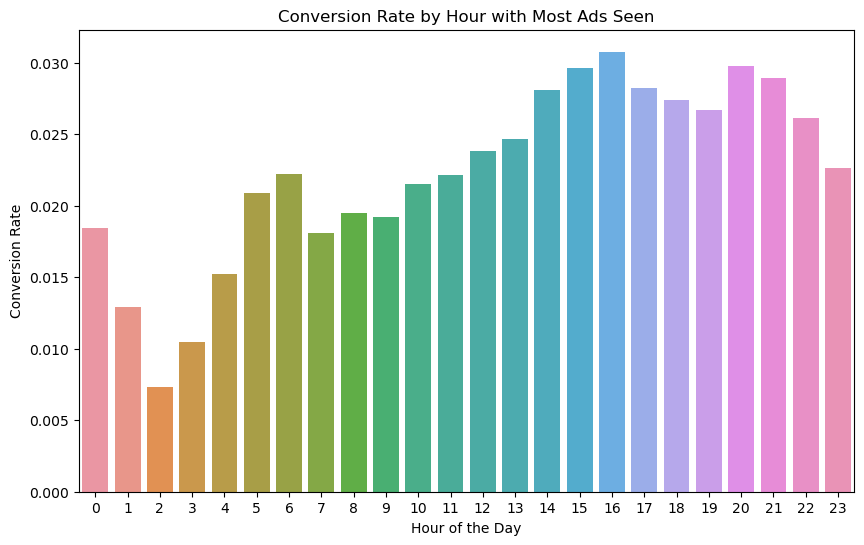

In [49]:
#conversion Rate by Most Ads Hour
hour_conversion_rate = data.groupby('most ads hour')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_conversion_rate, x='most ads hour', y='converted')
plt.title('Conversion Rate by Hour with Most Ads Seen')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.show()

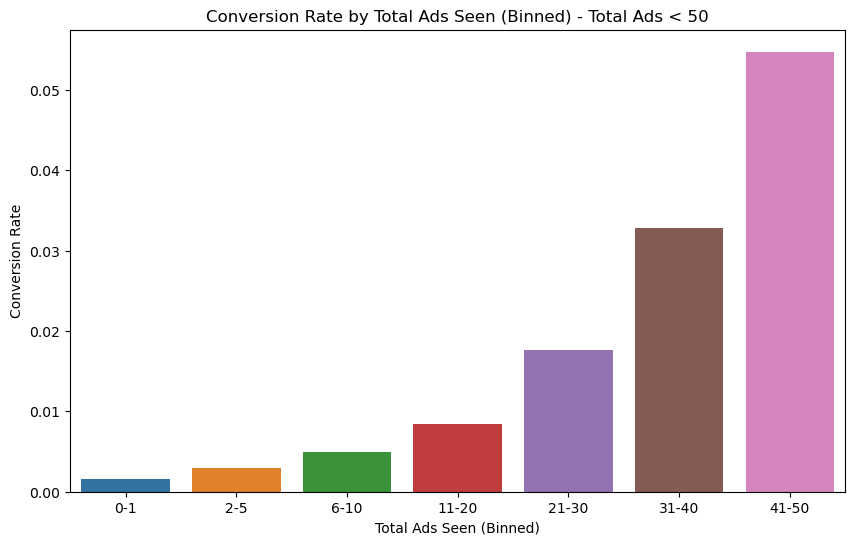

In [50]:
#conversion Rate by Total Ads
ads_conversion_rate_bin = df_subset.groupby('total_ads_bin')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=ads_conversion_rate_bin, x='total_ads_bin', y='converted')
plt.title('Conversion Rate by Total Ads Seen (Binned) - Total Ads < 50')
plt.xlabel('Total Ads Seen (Binned)')
plt.ylabel('Conversion Rate')
plt.show()